In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# delta time (timestep)
dt = 0.001
# Number of time steps
ndt = 500
# Length
L = 1
# Number of grids == number of nodes-1
ndx = 10
# boundary conditions pressure (numpy array with a length of 2)
bc_pressure = np.array([1, 0])
# Function to solve pressure equation for 1D
def pressure_equation(bc_pressure, dt, ndt, L, ndx):
    dx = L/ndx
    pressure = np.zeros(shape=[ndx+1, ndt])
    pressure[0,:] = bc_pressure[0].copy()
    pressure[-1,:] = bc_pressure[1].copy()
    dt_dx2 = dt/(dx*dx)
    for t in range(ndt-1):
        pressure[1:-1, t+1] = pressure[1:-1, t] + dt_dx2*(pressure[:-2, t] + pressure[2:, t] - 2*pressure[1:-1, t])
    return pressure

In [5]:
p = pressure_equation(bc_pressure, dt, ndt, L, ndx=10)

### Solve for different num of grids

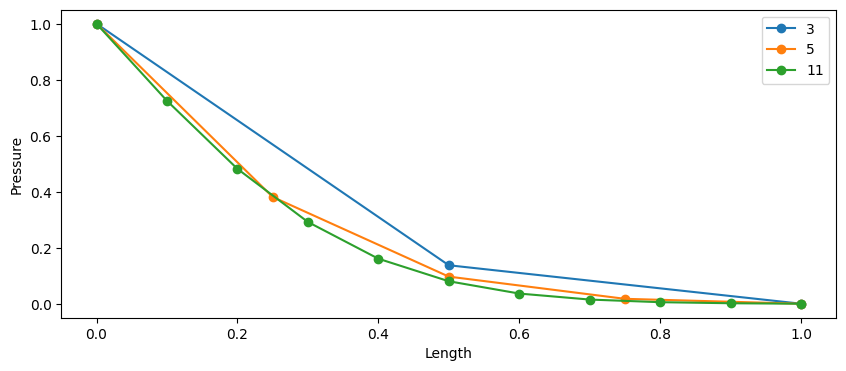

In [6]:
plt.figure(figsize=(10,4))
plt.ylabel('Pressure')
plt.xlabel('Length')
timestep = 40
ndt = 400
ndx = 2
plt.plot(np.linspace(0, L, ndx+1), pressure_equation(bc_pressure, dt, ndt, L, ndx=ndx)[:, timestep], 'o-')

ndx = 4
plt.plot(np.linspace(0, L, ndx+1), pressure_equation(bc_pressure, dt, ndt, L, ndx=ndx)[:, timestep], 'o-')

ndx = 10
plt.plot(np.linspace(0, L, ndx+1), pressure_equation(bc_pressure, dt, ndt, L, ndx=ndx)[:, timestep], 'o-')

plt.legend(['3', '5', '11'])

### Solve for different num of delta time

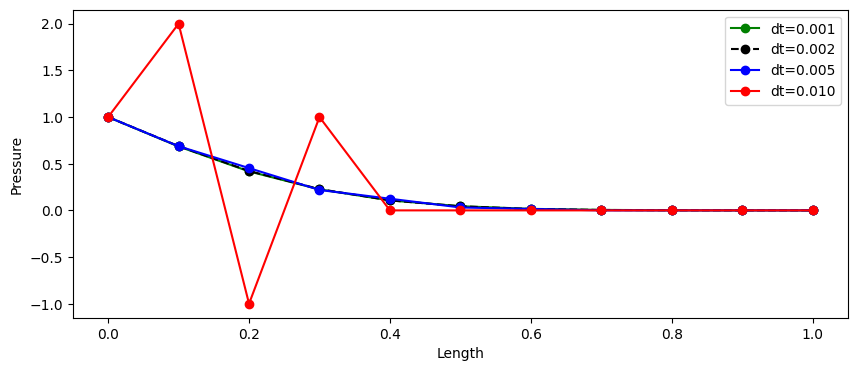

In [8]:
plt.figure(figsize=(10,4))
plt.ylabel('Pressure')
plt.xlabel('Length')
timestep = 3
ndt = 400
ndx = 10
dt = 0.001
plt.plot(np.linspace(0, L, ndx+1), pressure_equation(bc_pressure, dt, ndt=ndt, L=L, ndx=ndx)[:, 10*timestep], 'go-')

dt = 0.002
plt.plot(np.linspace(0, L, ndx+1), pressure_equation(bc_pressure, dt, ndt=ndt, L=L, ndx=ndx)[:, 5*timestep], 'ko--')

dt = 0.005
plt.plot(np.linspace(0, L, ndx+1), pressure_equation(bc_pressure, dt, ndt=ndt, L=L, ndx=ndx)[:, 2*timestep], 'bo-')

dt = 0.01
plt.plot(np.linspace(0, L, ndx+1), pressure_equation(bc_pressure, dt, ndt=ndt, L=L, ndx=ndx)[:, 1*timestep], 'ro-')

plt.legend(['dt=0.001', 'dt=0.002', 'dt=0.005', 'dt=0.010'])